In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train_csv = './Dataset/Dataset/train.csv'
test_csv = './Dataset/Dataset/test.csv'

In [2]:
train_df = pd.read_csv(train_csv)
train_df

,Image_name,Emotion
0,63119.png,happy
1,61769.png,neutral
2,95472.png,disgust
3,93515.png,neutral
4,56585.png,angry
...,...,...
7096,33657.png,angry
7097,91316.png,disgust
7098,86170.png,surprise
7099,8959.png,fear


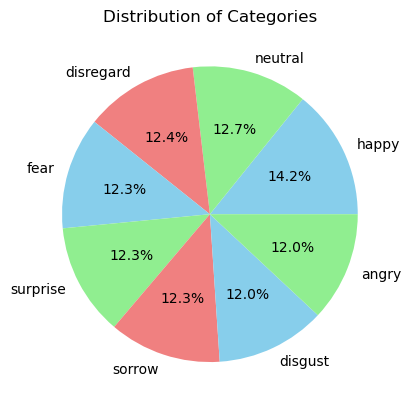

In [3]:
counts = train_df['Emotion'].value_counts()
# Plot value counts as pie chart
counts. plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Categories')
plt.ylabel('')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Emotion'])
class_names = label_encoder.classes_
print(class_names)
train_df

['angry' 'disgust' 'disregard' 'fear' 'happy' 'neutral' 'sorrow'
 'surprise']


,Image_name,Emotion,label
0,63119.png,happy,4
1,61769.png,neutral,5
2,95472.png,disgust,1
3,93515.png,neutral,5
4,56585.png,angry,0
...,...,...,...
7096,33657.png,angry,0
7097,91316.png,disgust,1
7098,86170.png,surprise,7
7099,8959.png,fear,3


In [11]:
import os
from PIL import Image
index = 1
root_dir = './Dataset/Dataset/Images'
img_name = os.path.join(root_dir,train_df.iloc[index,0])
image = Image.open(img_name)
print(dir(image))

['_Image__transformer', '_PngImageFile__frame', '_PngImageFile__prepare_idat', '__array_interface__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_category', '_close_exclusive_fp_after_loading', '_copy', '_crop', '_dump', '_ensure_mutable', '_exclusive_fp', '_exif', '_expand', '_fp', '_get_safe_box', '_getexif', '_getxmp', '_min_frame', '_new', '_open', '_reload_exif', '_repr_png_', '_repr_pretty_', '_seek', '_seek_check', '_size', '_text', 'alpha_composite', 'apply_transparency', 'close', 'convert', 'copy', 'crop', 'custom_mimetype', 'decoderconfig', 'decodermaxblock', 'default_image', 'draft', 'effect_spre

In [12]:
print(image.mode)

L


In [1]:
def fun(arg1, *argv):
    print("First argument :", arg1)
    for arg in argv:
        print("Argument *argv :", arg)


fun('Hello', 'Welcome', 'to', 'GeeksforGeeks')

First argument : Hello
Argument *argv : Welcome
Argument *argv : to
Argument *argv : GeeksforGeeks


In [2]:
def fun (**kwargs):
    for k, val in kwargs.items():
        print(k, val)

fun(s1='Geeks', s2='for', s3='Geeks')


s1 Geeks
s2 for
s3 Geeks


In [7]:
def fun(a, *args, **kwargs):
    print("Positional arguments:", args)
    print("Keyword arguments:", kwargs)

fun(1, 2, 3, 4, 5, d=1)

Positional arguments: (2, 3, 4, 5)
Keyword arguments: {'d': 1}


In [ ]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import data
from tensorflow.keras.preprocessing import image_dataset_from_directory

def custom_image_dataset_from_directory(directory, batch_size=32, img_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None):
    """
    Custom implementation of `image_dataset_from_directory`.

    Parameters:
        directory (str): Path to the dataset directory.
        batch_size (int): Number of images per batch.
        img_size (tuple): Target image size (height, width).
        shuffle (bool): Whether to shuffle the dataset.
        seed (int): Random seed for shuffling.
        validation_split (float, optional): Fraction of data to reserve for validation.
        subset (str, optional): "training" or "validation", if validation_split is provided.

    Returns:
        A TensorFlow dataset.
    """

    # Get all class names (folder names inside directory)
    class_names = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    num_classes = len(class_names)
    
    # Collect all image paths and labels
    file_paths = []
    labels = []
    
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for file in os.listdir(class_dir):
            if file.lower().endswith(('jpg', 'jpeg', 'png')):
                file_paths.append(os.path.join(class_dir, file))
                labels.append(label)
    
    # Convert to numpy arrays
    file_paths = np.array(file_paths)
    labels = np.array(labels)
    
    # Shuffle if required
    if shuffle:
        np.random.seed(seed)
        indices = np.arange(len(file_paths))
        np.random.shuffle(indices)
        file_paths, labels = file_paths[indices], labels[indices]

    # Apply validation split if needed
    if validation_split:
        if subset not in ["training", "validation"]:
            raise ValueError("Subset must be 'training' or 'validation' if validation_split is specified.")
        
        split_index = int(len(file_paths) * (1 - validation_split))
        if subset == "training":
            file_paths, labels = file_paths[:split_index], labels[:split_index]
        else:
            file_paths, labels = file_paths[split_index:], labels[split_index:]

    # Function to load and preprocess an image
    def load_and_preprocess(image_path, label):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, img_size)
        image = image / 255.0  # Normalize to [0, 1]
        return image, label

    # Create a TensorFlow dataset
    dataset = data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset, class_names

# Example usage:
dataset, class_names = custom_image_dataset_from_directory("path_to_dataset", batch_size=32, img_size=(224, 224), validation_split=0.2, subset="training")


In [21]:
import numpy as np
a = np.random.randint(0,10,(4,3))
indices_y = np.array([0,2,2,3])
indices_x = np.array([2,1,0,1])
##Write single line of code to get 1d array containing elements from the above 4X3 array at indices (0,2), (2,1), (2,0), (3,1)
print(a)
v_stack = np.vstack((indices_y, indices_x))
for i, j in zip(indices_y, indices_x):
    print(a[i][j])

[[5 5 7]
 [3 8 2]
 [1 4 0]
 [5 9 0]]
7
4
1
9


In [ ]:
## in the following snippet of code. a is a foreground image of 3 channels(randomly initialized here). b is like a background image(completely blue color image here of the same dimension).
## mask is a 2d numpy array of same dimension containing only 0 or 1 values representing a mask for the foreground.
## Write code to prepare a third image which takes in the foreground image where mask is 1 and takes the background image where mask is 0
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
a = np.random.randint(0,255,size = (100,100,3), dtype=np.uint8)
cv2_imshow(a)
b = np.tile(np.array([[[255,0,0]]],dtype=np.uint8),(100,100,1))
cv2_imshow(b)
mask = np.zeros((100,100),dtype = int)
mask[25:75, 25:75]= 1
c = np.zeros((100,100))
for i, j in zip(c,mask):    
    if mask[i][j] == 1:
        c[i][j] = a[i][j]
    else:
        c[i][j]= b[i][j]